In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import joblib

In [6]:
cardio=pd.read_csv('Cardio - vascular.csv', sep=";")

In [7]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Drop the id Column

In [8]:
cardio.drop("id",axis=1,inplace=True)

In [9]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# creating the age by year

In [10]:
cardio['years'] = (cardio['age'] / 360).round().astype('int')

In [11]:
cardio.drop("age",axis=1,inplace=True)

In [12]:
cardio = cardio.rename(columns = {'years' : 'age'})

In [13]:
cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,2,168,62.0,110,80,1,1,0,0,1,0,51
1,1,156,85.0,140,90,3,1,0,0,1,1,56
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,49
4,1,156,56.0,100,60,1,1,0,0,0,0,49


# Creating the Body mass index (BMI)

In [14]:
cardio["bmi"] = cardio["weight"] / (cardio["height"]/100)**2

In [15]:
cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


In [16]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  age          70000 non-null  int32  
 12  bmi          70000 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.7 MB


In [18]:
cardio.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age            0
bmi            0
dtype: int64

# Statistics

In [19]:
cardio.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,54.077900,27.556513
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.858852,6.091511
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000,26.374068
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,66.000000,298.666667


# visualizing of cases occurs according to the age

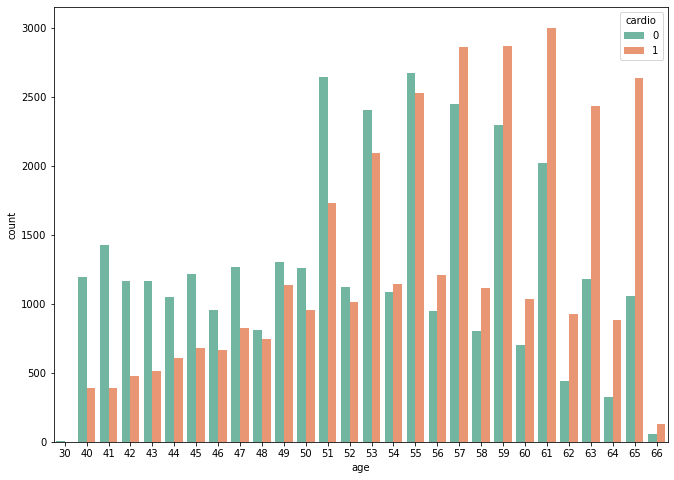

In [20]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = cardio, palette="Set2");

# visualizing of cases occurs according to the gender

<AxesSubplot:xlabel='gender', ylabel='count'>

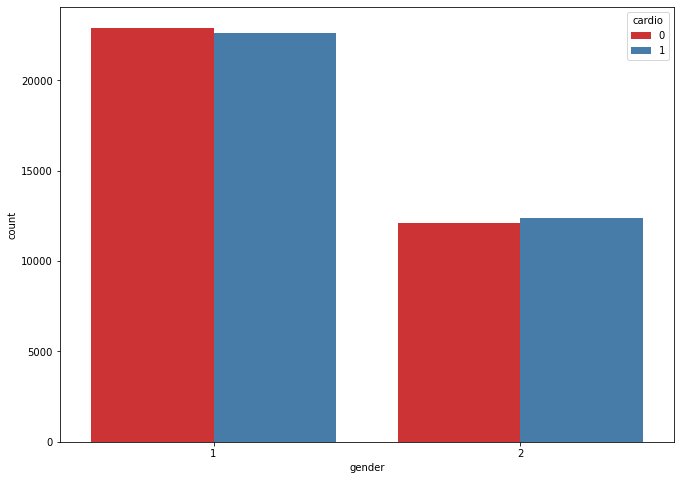

In [21]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = cardio, palette="Set1")

In [22]:
cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


# check the correlation between gender and cardio

In [23]:
corr = cardio[['gender', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


# check the correlation between height and cardio

In [24]:
corr = cardio[['height', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,height,cardio
height,1.000000,-0.010821
cardio,-0.010821,1.000000


# check the correlation between weight and cardio

In [25]:
corr = cardio[['weight', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,weight,cardio
weight,1.000000,0.181660
cardio,0.181660,1.000000


# check the correlation between Systolic blood pressure and cardio

In [26]:
corr = cardio[['ap_hi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


# check the correlation between Diastolic blood pressure and cardio

In [27]:
corr = cardio[['ap_lo', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


# check the correlation between cholesterol and cardio

In [28]:
corr = cardio[['cholesterol', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,cholesterol,cardio
cholesterol,1.000000,0.221147
cardio,0.221147,1.000000


# check the correlation between Glucose and cardio

In [29]:
corr = cardio[['gluc', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gluc,cardio
gluc,1.000000,0.089307
cardio,0.089307,1.000000


# check the correlation between age and cardio

In [30]:
corr = cardio[['age', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,cardio
age,1.000000,0.237622
cardio,0.237622,1.000000


# check the correlation between BMI and cardio

In [31]:
corr = cardio[['bmi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,bmi,cardio
bmi,1.000000,0.165632
cardio,0.165632,1.000000


# How many Smokers and Non-Smokers

In [32]:
num = cardio["smoke"].value_counts("0")
num


0    0.911871
1    0.088129
Name: smoke, dtype: float64

In [33]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print(f"There are  {int(num_ns)}  Non-Smokers and  {int(num_s)}  Smokers in the data set.")

There are  63830  Non-Smokers and  6169  Smokers in the data set.


In [34]:
cardio.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age', 'bmi'],
      dtype='object')

# Machine Learning

In [35]:
cardio.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age', 'bmi'],
      dtype='object')

In [36]:
column_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active','age', 'bmi','cardio']

In [37]:
cardio = cardio.reindex(columns=column_names)

In [38]:
cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age,bmi,cardio
0,2,168,62.0,110,80,1,1,0,0,1,51,21.967120,0
1,1,156,85.0,140,90,3,1,0,0,1,56,34.927679,1
2,1,165,64.0,130,70,3,1,0,0,0,52,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,49,28.710479,1
4,1,156,56.0,100,60,1,1,0,0,0,49,23.011177,0


# set X & y variables

In [39]:
X = cardio.drop('cardio', axis=1)
y = cardio['cardio']

# Split the data into train and test samples

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [41]:
y_train.value_counts()

1    28048
0    27952
Name: cardio, dtype: int64

In [42]:
y_test.value_counts()

0    7069
1    6931
Name: cardio, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [46]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [47]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7226071428571429
Testing Accuracy: 0.7177857142857142
Testing Confusion Matrix: 
[[5427 1642]
 [2309 4622]]
Testing Recall: 0.666859039099697
Testing Precesion: 0.73786717752235
Testing F-1: 0.7005683971201212
Testing F-Beta: 0.7224810079094635
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.7809642857142857
Testing Accuracy: 0.6883571428571429
Testing Confusion Matrix: 
[[5040 2029]
 [2334 4597]]
Testing Recall: 0.6632520559803781
Testing Precesion: 0.6937820706308482
Testing F-1: 0.6781736372353766
Testing F-Beta: 0.6874532675340213
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9783214285714286
Testing Accuracy: 0.6344285714285715
Testing Confusion Matrix: 
[[4601 2468]
 [2650 4281]]
Testing Recall: 0.6176597893521858
Testing Precesion: 0.6343161949918507
Testing F-1: 0.6258771929824561
Testing F-Beta: 0.6309134317799983
------------------------------
Training Model RF 
--------------


In [48]:
s = [1,156,85.0,140,90,3,1,0,0,1,56,34.927679]
o = model.predict([s])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [49]:
o

array([1], dtype=int64)